In [158]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import json
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [159]:
def conversion():
    csv_file_1 = pd.read_csv('Fake.csv')
    csv_file_2 = pd.read_csv('True.csv')
    
    # Concatenate the two DataFrames
    combined_df = pd.concat([csv_file_1, csv_file_2], ignore_index=True)
    
    # Save the combined DataFrame to a new CSV file
    combined_df.to_excel('combined_csv_file_final.xls', index=False)


In [160]:
print(data)


                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44788  'Fully committed' NATO backs new U.S. approach...   
44789  LexisNexis withdrew two products from Chinese ...   
44790  Minsk cultural hub becomes haven from authorities   
44791  Vatican upbeat on possibility of Pope Francis ...   
44792  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text label Unnamed: 3  \
0      Donald Trump just couldn t wish all Americans ...  Fake        NaN   
1      House Intelligence Committee Chairman Devin Nu...  Fake        NaN   
2      On Friday, it was revealed that former Mi

In [161]:
for i in range(len(data['text_combined'])):
    if type(data['text_combined'][i]) != type("hye"):
        print(i)

In [162]:

max_sequence_length = 30
# Create a tokenizer and fit it on your text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text_combined'])

# Convert text data into numerical representations
X = tokenizer.texts_to_sequences(data['text_combined'])
X = pad_sequences(X, maxlen=max_sequence_length)  # Define max_sequence_length

y = data['label']
tokenizer_config = tokenizer.to_json()
with open("tokenizer_config.json", "w") as json_file:
    json.dump(tokenizer_config, json_file)

In [163]:
from gensim.models import Word2Vec

# Train Word2Vec on your tokenized text
sentences = [text.split() for text in data['text_combined']]


In [164]:
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

In [165]:
print(type(X))
print(X[0])
for i in range(len(X)):
    for j in range(len(X[i])):
        X[i][j] = int(X[i][j])

<class 'numpy.ndarray'>
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0   61    2 1059   38 1150   28 4841 2889  417   40
   15 1449]


In [166]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'])
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(label_encoder, file)

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [168]:
print(y[0])

0


In [169]:

# Define a larger and more powerful DNN architecture
model = Sequential()

# Embedding layer
model.add(layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_sequence_length))

# Convolutional layers for feature extraction
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.Conv1D(128, 5, activation='relu'))

# Bidirectional LSTM for sequential information
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
model.add(layers.GlobalMaxPool1D())

# Dense layers with dropout for regularization
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(layers.Dropout(0.5))

# Output layer
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 30, 100)           3175400   
                                                                 
 conv1d_14 (Conv1D)          (None, 26, 128)           64128     
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 6, 128)            0         
 g1D)                                                            
                                                                 
 conv1d_15 (Conv1D)          (None, 2, 128)            82048     
                                                                 
 bidirectional_7 (Bidirecti  (None, 2, 128)            98816     
 onal)                                                           
                                                                 
 global_max_pooling1d_7 (Gl  (None, 128)             

In [170]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
560/560 [==============================] - 12s 18ms/step - loss: 1.7477 - accuracy: 0.8611 - val_loss: 0.9904 - val_accuracy: 0.9480
Epoch 2/10
560/560 [==============================] - 8s 15ms/step - loss: 0.6713 - accuracy: 0.9629 - val_loss: 0.4420 - val_accuracy: 0.9613
Epoch 3/10
560/560 [==============================] - 8s 15ms/step - loss: 0.2881 - accuracy: 0.9810 - val_loss: 0.2475 - val_accuracy: 0.9619
Epoch 4/10
560/560 [==============================] - 8s 15ms/step - loss: 0.1372 - accuracy: 0.9897 - val_loss: 0.1825 - val_accuracy: 0.9624
Epoch 5/10
560/560 [==============================] - 8s 14ms/step - loss: 0.0758 - accuracy: 0.9946 - val_loss: 0.1695 - val_accuracy: 0.9639
Epoch 6/10
560/560 [==============================] - 8s 14ms/step - loss: 0.0495 - accuracy: 0.9968 - val_loss: 0.1671 - val_accuracy: 0.9605
Epoch 7/10
560/560 [==============================] - 8s 14ms/step - loss: 0.0366 - accuracy: 0.9981 - val_loss: 0.1578 - val_accuracy: 0.964

In [171]:
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Convert predictions back to original labels
y_pred_original = label_encoder.inverse_transform(y_pred.flatten())

280/280 [==============================] - 1s 2ms/step


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      4680
           1       0.97      0.96      0.96      4279

    accuracy                           0.97      8959
   macro avg       0.97      0.97      0.97      8959
weighted avg       0.97      0.97      0.97      8959


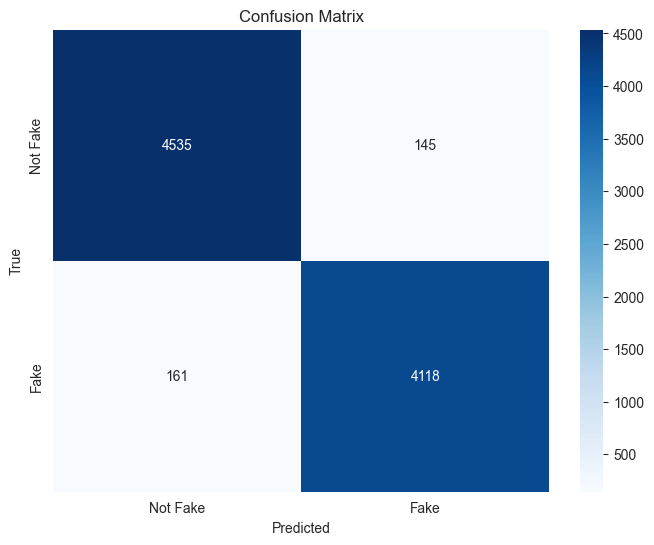

In [172]:


# Convert predictions back to original labels
y_pred_original = label_encoder.inverse_transform(y_pred.flatten())

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [173]:
model.save('fake_news_detection_model.h5')

/Users/manideep/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**This Less Powerful Model PS:Actually maybe Better ;)**

In [174]:
# import tensorflow as tf
# from tensorflow.keras import layers, Sequential
# 
# model = Sequential([
#     layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])
# 
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))
# model.summary()

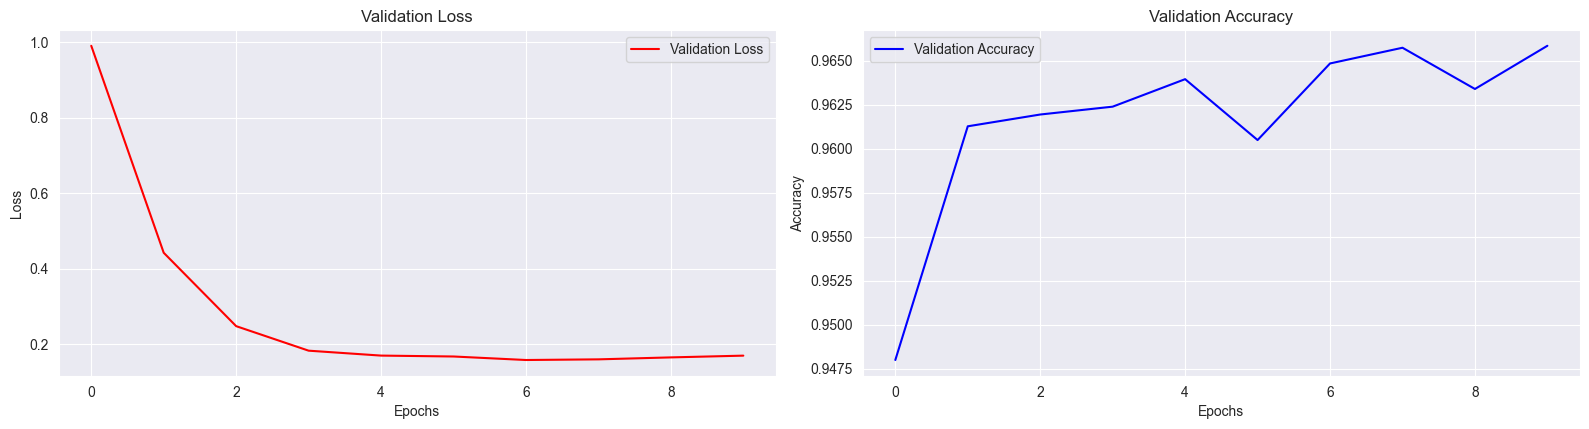

In [175]:
# Plot all metrics
plt.figure(figsize=(16, 8))

# Plot Validation Loss
plt.subplot(2, 2, 1)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Validation Accuracy
plt.subplot(2, 2, 2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()



plt.tight_layout()
plt.show()

In [176]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9659863945578231
Recall: 0.9623743865389109
F1 Score: 0.9641770077265277
